# Mengimport library yang diperlukan

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Memuat dataset

In [3]:
data = pd.read_csv('../Dataset/brain_stroke.csv')

In [4]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


# Preprocessing

In [5]:
data.shape

(4981, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [7]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [9]:
data.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [10]:
# Mengelompokkan data berdasarkan kategori
data_cat = data[['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']]

In [11]:
data_cat

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,formerly smoked,1
1,Male,0,1,Yes,Private,Rural,never smoked,1
2,Female,0,0,Yes,Private,Urban,smokes,1
3,Female,1,0,Yes,Self-employed,Rural,never smoked,1
4,Male,0,0,Yes,Private,Urban,formerly smoked,1
...,...,...,...,...,...,...,...,...
4976,Male,0,0,No,Private,Rural,formerly smoked,0
4977,Male,0,0,Yes,Private,Urban,smokes,0
4978,Female,1,0,Yes,Govt_job,Rural,smokes,0
4979,Male,0,0,Yes,Private,Rural,smokes,0


In [12]:
# Mengumpulkan / mencari nilai kategori dari setiap kolom
for i in data_cat.columns:
    print(f'{i} : ', data_cat[i].unique())

gender :  ['Male' 'Female']
hypertension :  [0 1]
heart_disease :  [1 0]
ever_married :  ['Yes' 'No']
work_type :  ['Private' 'Self-employed' 'Govt_job' 'children']
Residence_type :  ['Urban' 'Rural']
smoking_status :  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke :  [1 0]


In [13]:
#Mengetahui frekuensi tiap kategori dari variabel dataset
for i in data_cat.columns:
    print(data_cat[i].value_counts())

Female    2907
Male      2074
Name: gender, dtype: int64
0    4502
1     479
Name: hypertension, dtype: int64
0    4706
1     275
Name: heart_disease, dtype: int64
Yes    3280
No     1701
Name: ever_married, dtype: int64
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64
Urban    2532
Rural    2449
Name: Residence_type, dtype: int64
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64
0    4733
1     248
Name: stroke, dtype: int64


# Exploratory Data Analysis

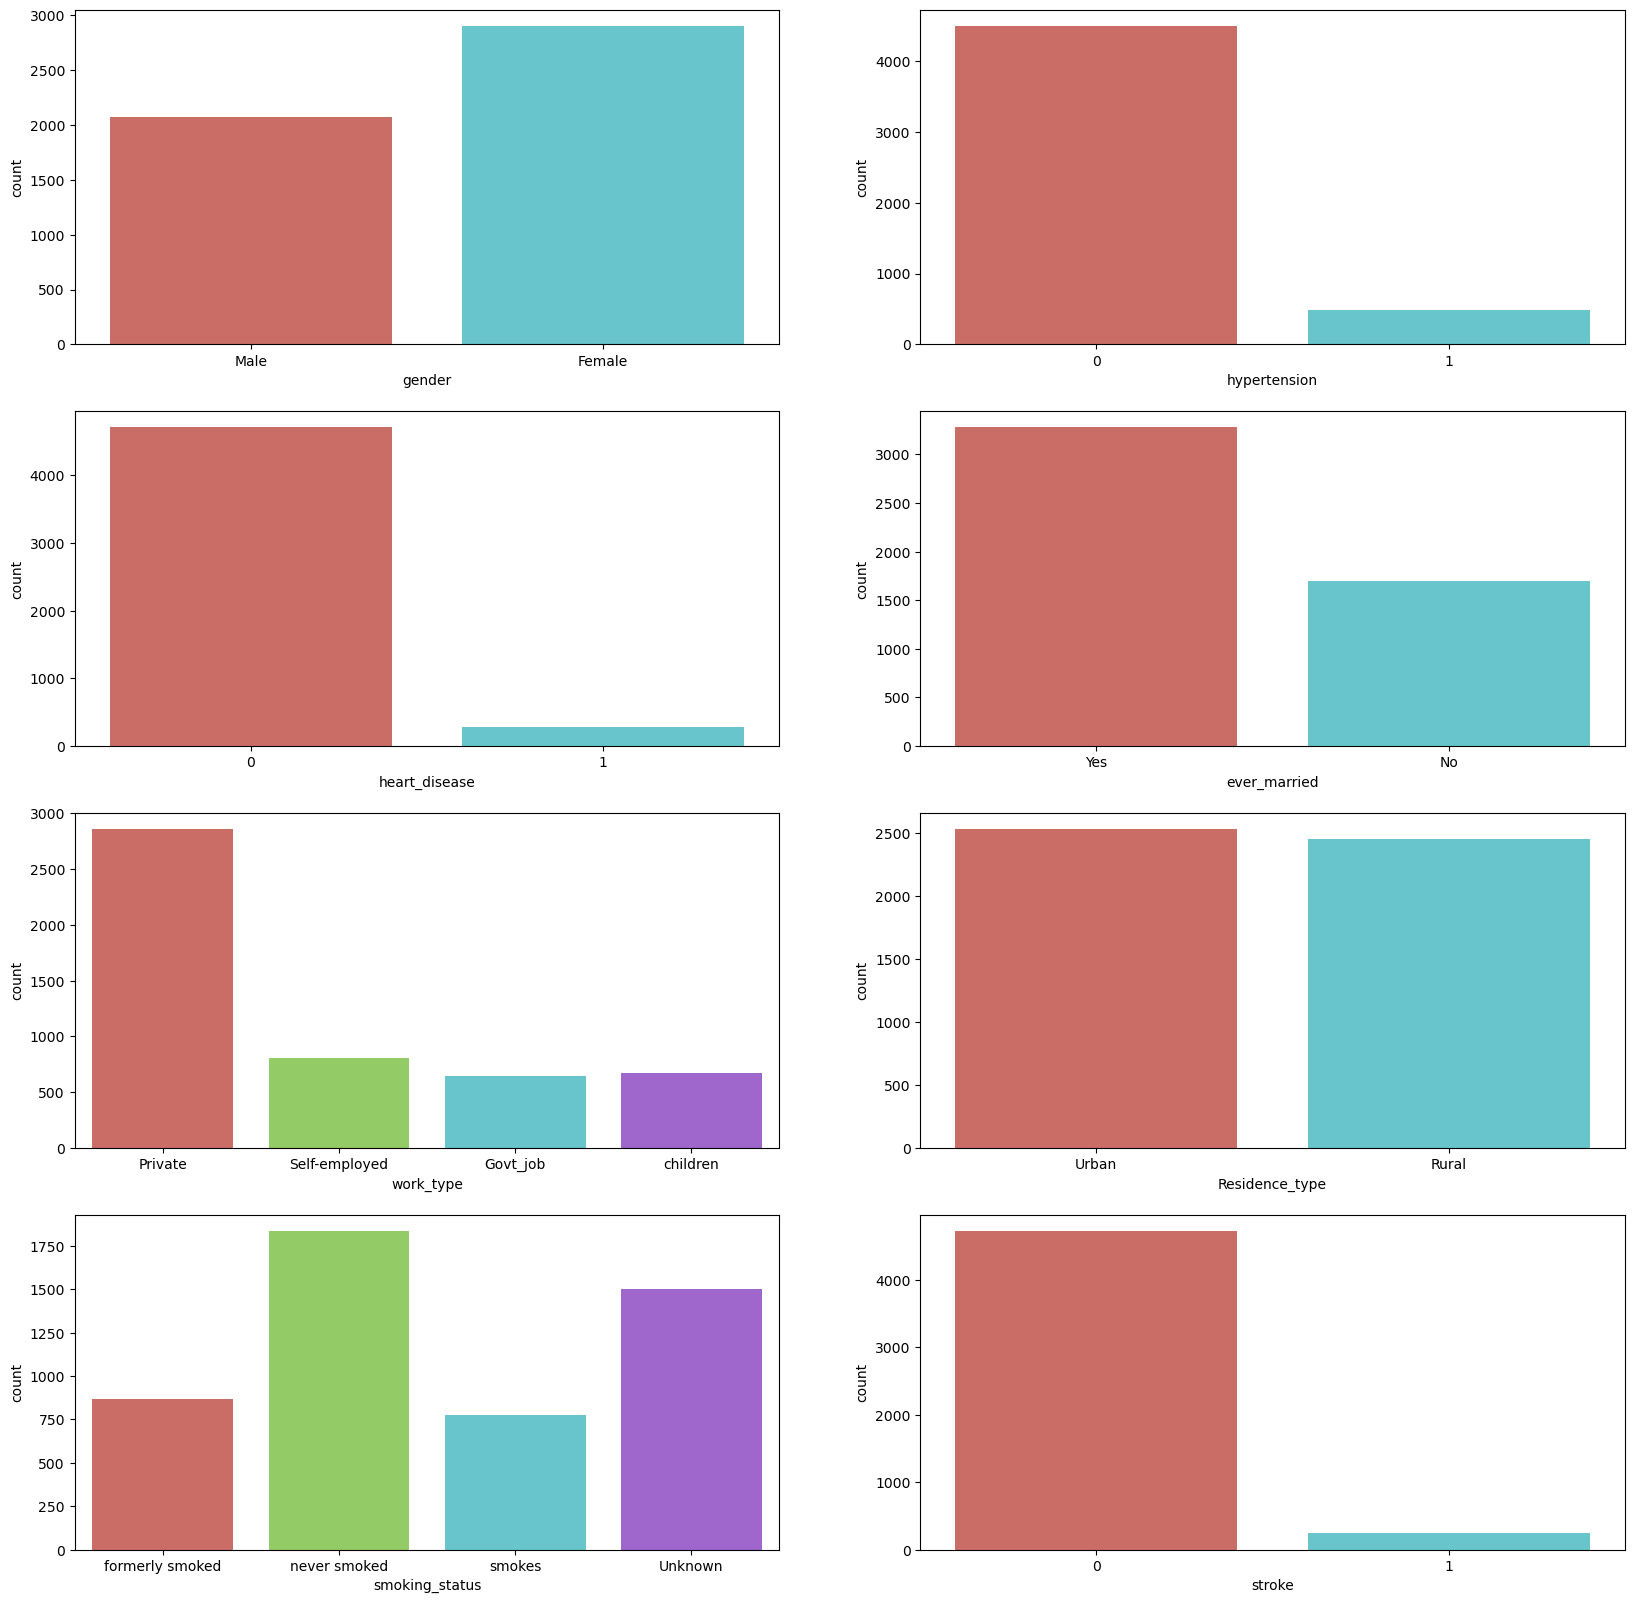

In [14]:
f = plt.figure(figsize=(20,20))
index = 1
for i in data_cat.columns:
    f.add_subplot(4,2,index)
    sns.countplot(data_cat[i], data = data_cat, palette='hls')
    index+=1


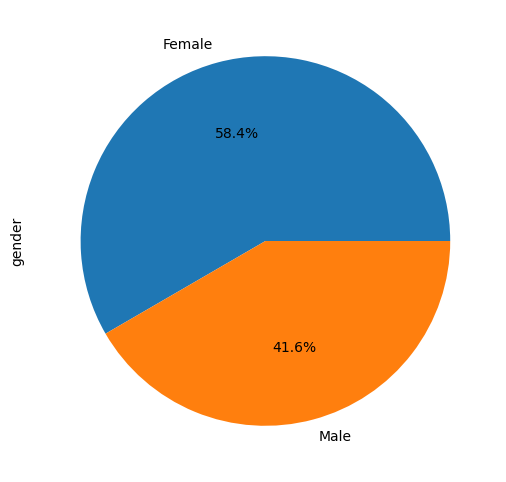

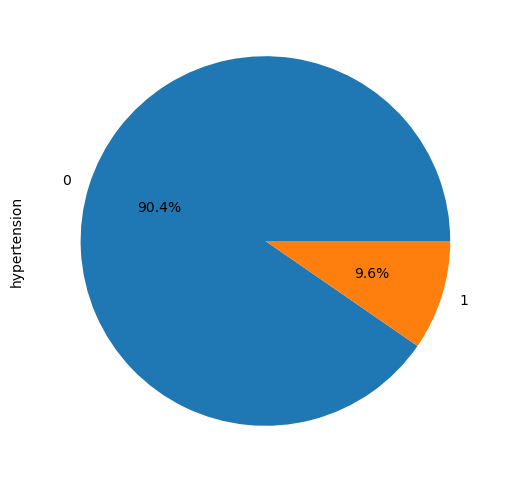

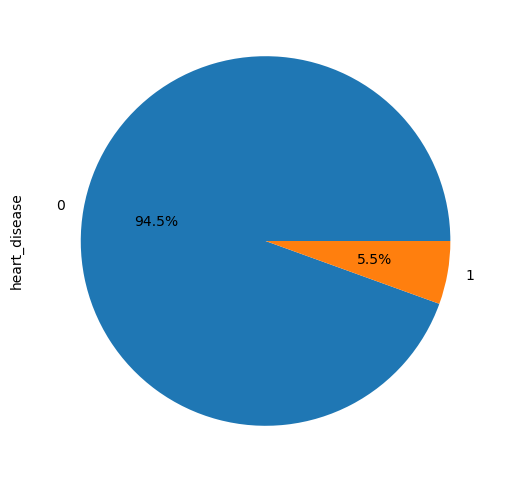

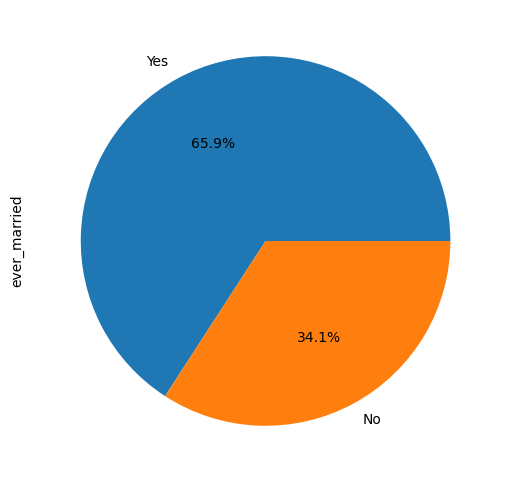

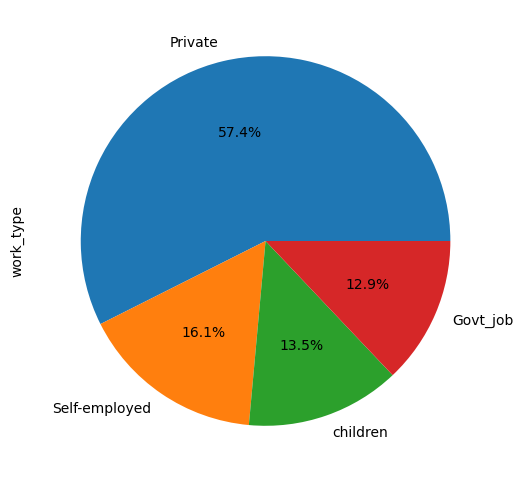

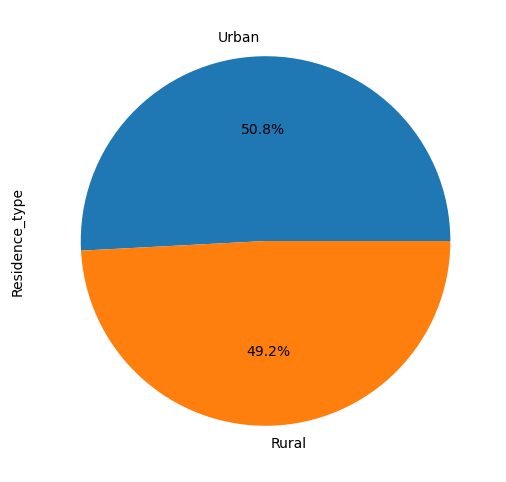

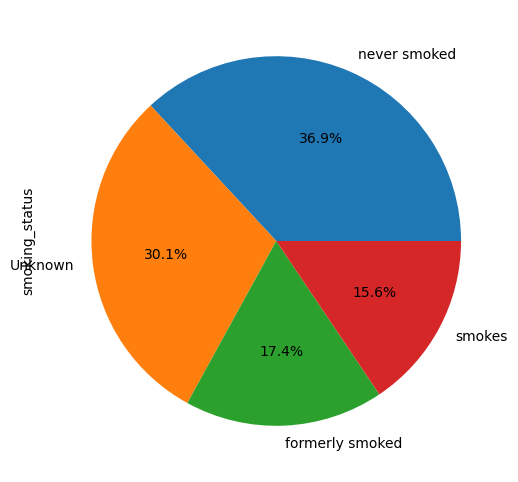

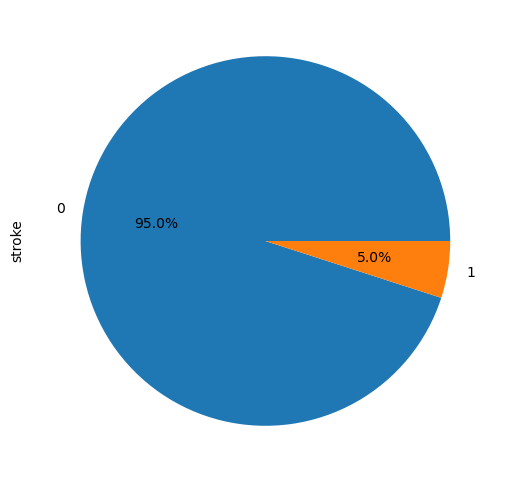

In [15]:
for i in data_cat.columns:
  plt.figure(figsize=(15,6))
  data_cat[i].value_counts().plot(kind='pie',autopct='%1.1f%%')
  plt.xticks(rotation=90)
  plt.show()

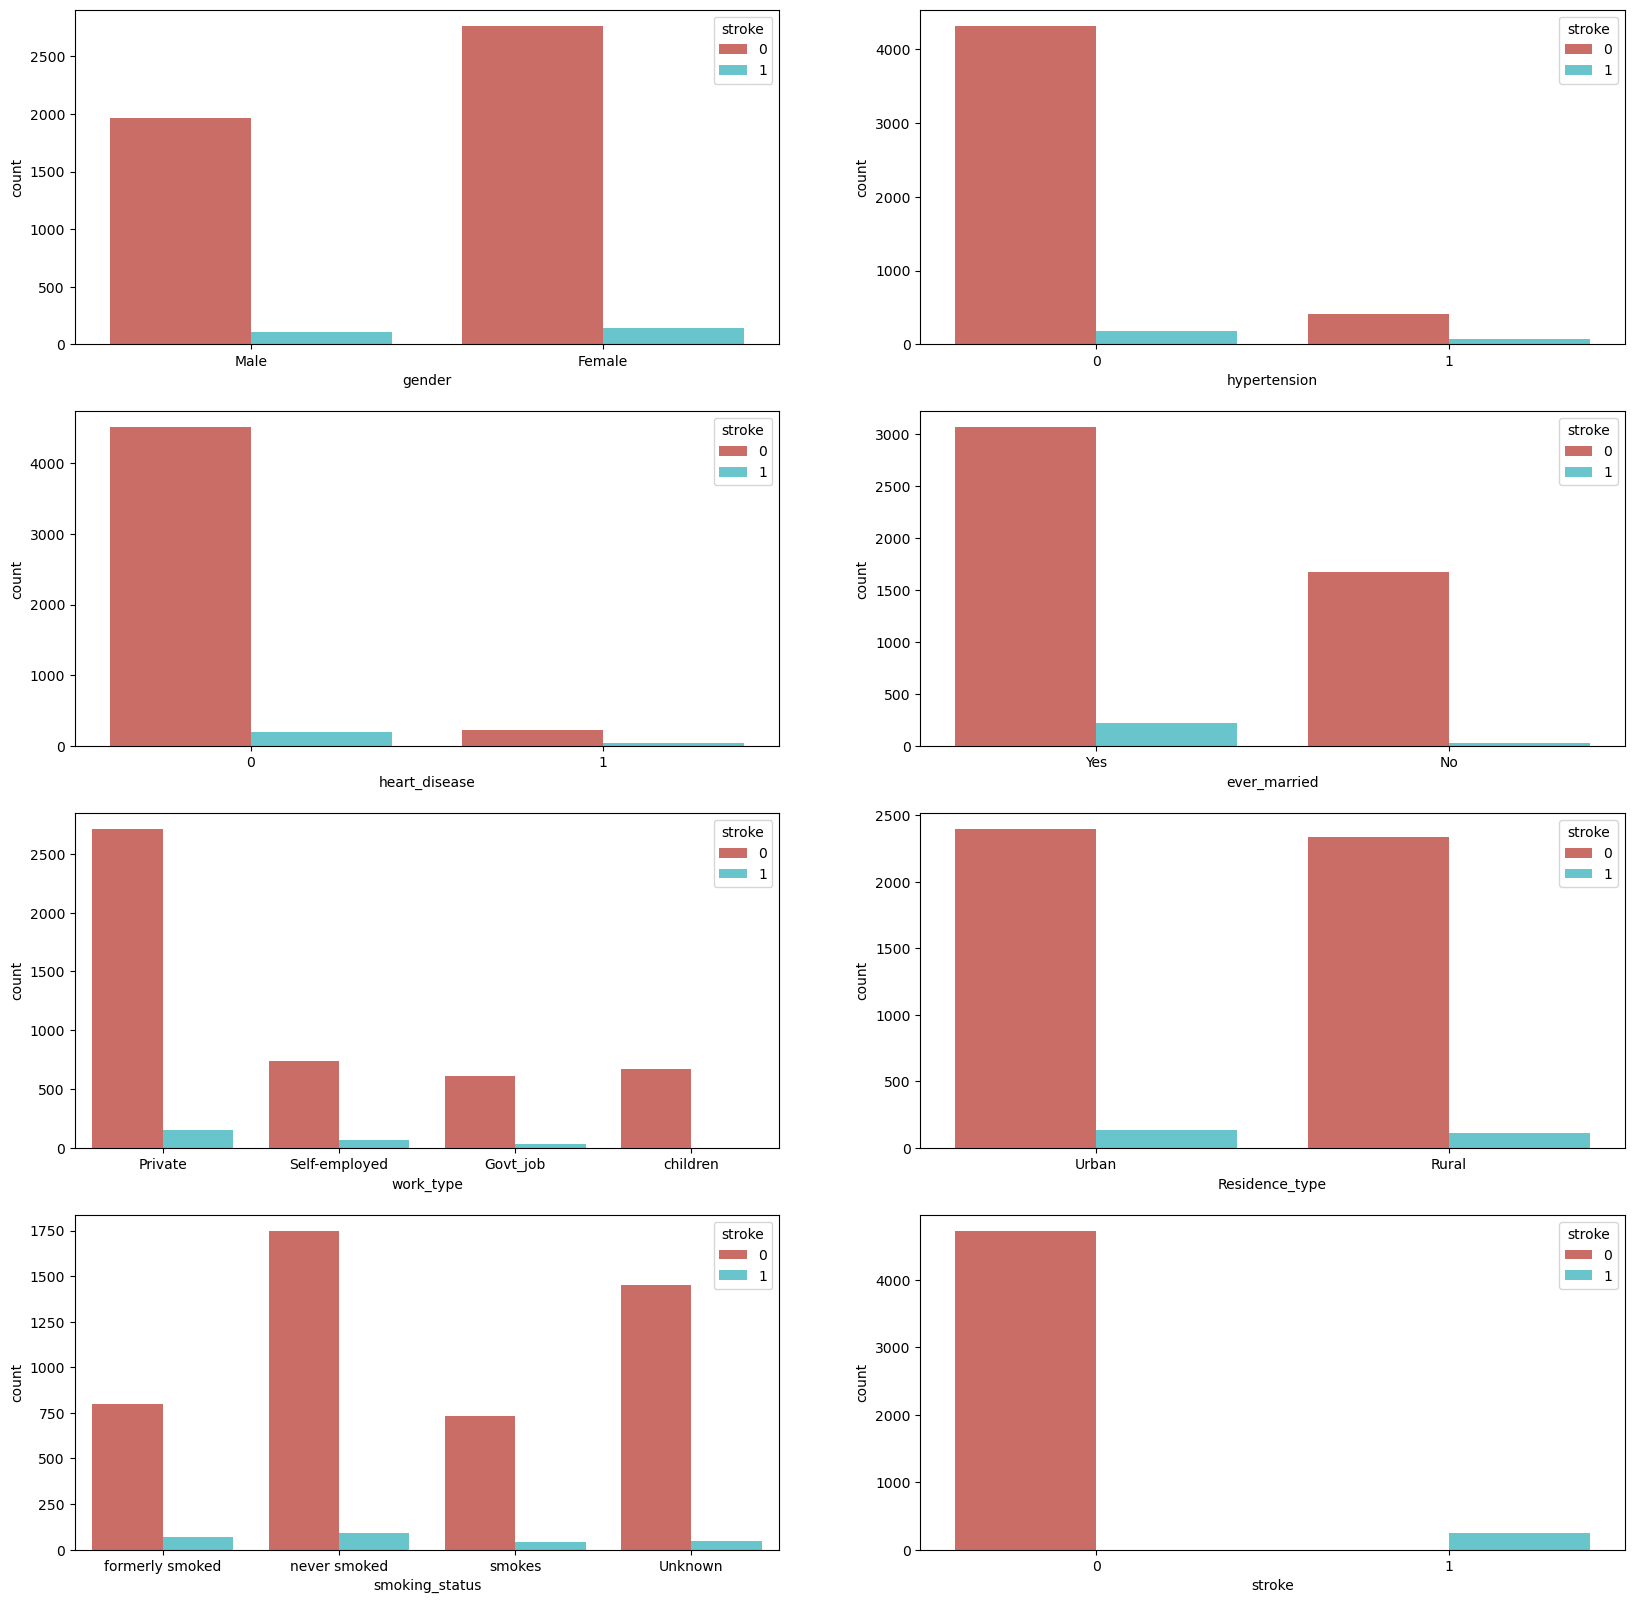

In [16]:
f = plt.figure(figsize=(20,20))
index = 1
for i in data_cat.columns:
    f.add_subplot(4,2,index)
    sns.countplot(data_cat[i], data = data_cat, hue='stroke', palette='hls')
    index+=1

In [17]:
# Mengubah yes / no menjadi 1 dan 0
data['ever_married'] = [0 if i !='Yes' else 1 for i in data['ever_married']]

In [18]:
data['gender'] = [0 if i != 'Female' else 1 for i in data['gender']]

In [19]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
2,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
3,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
4,0,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [20]:
data = pd.get_dummies(data, columns = ['work_type', 'Residence_type', 'smoking_status'])

In [21]:
data.sample(10)

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1957,0,46.0,0,0,1,91.08,27.7,0,0,1,0,0,0,1,0,0,1,0
3128,1,8.0,0,0,0,67.84,24.0,0,0,0,0,1,1,0,1,0,0,0
741,0,38.0,0,0,1,70.53,40.9,0,1,0,0,0,0,1,0,0,0,1
2372,1,59.0,0,0,1,123.47,27.5,0,0,1,0,0,1,0,1,0,0,0
2140,0,82.0,0,0,1,89.83,24.7,0,0,1,0,0,0,1,0,0,0,1
1731,1,76.0,0,0,1,204.05,23.5,0,1,0,0,0,0,1,0,0,1,0
3430,1,75.0,0,0,1,70.22,24.8,0,0,0,1,0,1,0,0,1,0,0
4221,1,37.0,0,0,1,98.02,20.4,0,0,1,0,0,0,1,0,0,1,0
3323,1,27.0,0,0,1,79.21,19.5,0,0,1,0,0,0,1,1,0,0,0
4113,0,21.0,0,0,0,73.81,19.8,0,0,1,0,0,0,1,1,0,0,0


# Modelling

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [23]:
#Menghapus variabel stroke dari dataset yang masuk sebagai variabel X dan inisialisasi variabel stroke sebagai variabel y
X = data.drop(['stroke'],axis = 1)
y = data['stroke']

In [24]:
#Membagi dataset menjadi data training dan testing dengan rasio 30% data digunakan sebagai data testing. Dengan pemilihan random data sebesar 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

((3486, 17), (1495, 17))

In [25]:
#Membuat model random forest dengan banyak tree dalam forest adalah 10 serta untuk mengukur kualitas split menggunakan entropi untuk perolehan infomasi
classifier_rf = RandomForestClassifier(n_estimators=50)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [26]:
#Memperoleh nilai y prediksi dari variabel-variabel X data testing
y_pred = classifier_rf.predict(X_test)

In [27]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Evaluasi

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
#Menghitung confusion matrix dari y hasil prediksi dan y nilai asli
cm = confusion_matrix(y_test, y_pred)

In [30]:
print(cm)

[[1412    5]
 [  78    0]]


In [31]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', classifier_rf.score(X_train, y_train))

Training-set accuracy score: 1.0


In [32]:
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Training-set accuracy score:', classifier_rf.score(X_test, y_test))

Training-set accuracy score: 0.9444816053511705


In [33]:
#Proporsi kelas 1 (stroke=yes)
y_train.sum()/y_train.count()

0.04876649454962708

In [34]:
#Proporsi kelas 1 (stroke=yes)
y_train.sum()/y_train.count()

0.04876649454962708

# Balancing Data

In [35]:
from imblearn.over_sampling import SMOTE
# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

In [36]:
# MODEL
#Membuat model random forest dengan banyak tree dalam forest adalah 50 serta untuk mengukur kualitas split menggunakan gini untuk perolehan infomasi
classifier_rf2 = RandomForestClassifier(n_estimators=50)
classifier_rf2.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier(n_estimators=50)

In [37]:
#Proporsi kelas 1 (stroke=yes) setelah diSMOTE
y_train_SMOTE.sum()/y_train_SMOTE.count()

0.5

In [38]:
#Memperoleh nilai y prediksi dari variabel-variabel X data testing
y_pred = classifier_rf2.predict(X_test)

In [39]:
#Menghitung confusion matrix dari y hasil prediksi dan y nilai asli
cm = confusion_matrix(y_test, y_pred)
cm

array([[1398,   19],
       [  74,    4]], dtype=int64)

In [40]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', classifier_rf2.score(X_train_SMOTE, y_train_SMOTE))
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Training-set accuracy score:', classifier_rf2.score(X_test, y_test))

Training-set accuracy score: 0.9998492159227985
Training-set accuracy score: 0.9377926421404682


# Model Stacking

In [41]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import accuracy_score

In [42]:
# List Base Model
base_models = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    GradientBoostingClassifier(n_estimators=100, random_state=42),
    AdaBoostClassifier(n_estimators=100, random_state=42)
]

In [43]:
# Meta Model
meta_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [44]:
# Objek Stacking Model
stacking_model = StackingClassifier(
    classifiers=base_models,
    meta_classifier=meta_model,
    use_probas=True,
    average_probas=False
)

In [45]:
# fit modelnya
stacking_model.fit(X_train_SMOTE, y_train_SMOTE)

StackingClassifier(classifiers=[RandomForestClassifier(random_state=42),
                                GradientBoostingClassifier(random_state=42),
                                AdaBoostClassifier(n_estimators=100,
                                                   random_state=42)],
                   meta_classifier=RandomForestClassifier(random_state=42),
                   use_probas=True)

In [46]:
# Menggunakan model stacking untuk predicting
y_pred = stacking_model.predict(X_test)

In [47]:
#Skor akurasi prediction dari test data
print('Testing-set accuracy score:', accuracy_score(y_test, y_pred))

Testing-set accuracy score: 0.9311036789297659


In [48]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', stacking_model.score(X_train_SMOTE, y_train_SMOTE))
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Test-set accuracy score:', stacking_model.score(X_test, y_test))

Training-set accuracy score: 1.0
Test-set accuracy score: 0.9311036789297659


In [49]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1388   29]
 [  74    4]]


In [50]:
# Classification report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1417
           1       0.12      0.05      0.07        78

    accuracy                           0.93      1495
   macro avg       0.54      0.52      0.52      1495
weighted avg       0.91      0.93      0.92      1495



# Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(stacking_model, X_train, y_train, cv=5)

In [52]:
print('Cross-validation score:', scores.mean())

Cross-validation score: 0.9463562628210134


# Mencoba menggunakan undersampling

In [53]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler()
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train, y_train)

In [54]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# Train model menggunakan data yang diresample
model.fit(X_train_resampled, y_train_resampled)

# Evaluasi modelnya
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7384615384615385


In [55]:
classifier_rf2_under = RandomForestClassifier(n_estimators=50)
classifier_rf2_under.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(n_estimators=50)

In [56]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', classifier_rf2_under.score(X_train_resampled, y_train_resampled))
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Testing-set accuracy score:', classifier_rf2_under.score(X_test, y_test))

Training-set accuracy score: 1.0
Testing-set accuracy score: 0.7277591973244147


OVERFIT